

# 👨‍💻 Hammad Zahid
### Software Developer | Tech Enthusiast

## 📞 Contact & Profiles
- **LinkedIn:** [linkedin.com/in/hammad-zahid-xyz](https://www.linkedin.com/in/hammad-zahid-xyz)
- **GitHub:** [github.com/Hamad-Ansari](https://github.com/Hamad-Ansari)
- **Email:** mrhammadzahi24@gmail.com
- **Twitter:** @hammadzahid
- **TikTok:** @photographicmemory01

## 🎯 About This Notebook
This notebook demonstrates [Project/Topic Name]. 
Feel free to connect with me for collaborations or questions!

# Will they tsy in our bank or choose an other one ? Deep Learning Approach 


# AIM: `WE will classifiy the customers who will stay in our bank or leave the bank using deep learning approach.`

![imresizer-1706204681767.jpg](attachment:imresizer-1706204681767.jpg)

----
## ***1. About Dataset***
---

`Columns Description:`

- *`Customer ID:` A unique identifier for each customer*
- *`Surname:` The customer's surname or last name*
- *`Credit Score:` A numerical value representing the customer's credit score*
- *`Geography:` The country where the customer resides (France, Spain or Germany)*
- *`Gender:` The customer's gender (Male or Female)*
- *`Age:` The customer's age.*
- *`Tenure:` The number of years the customer has been with the bank*
- *`Balance:` The customer's account balance*
- *`NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card)*
- *`HasCrCard:` Whether the customer has a credit card (1 = yes, 0 = no)*
- *`IsActiveMember:` Whether the customer is an active member (1 = yes, 0 = no)*
- *`EstimatedSalary:` The estimated salary of the customer*
- *`Exited:` Whether the customer has churned (1 = yes, 0 = no)*

In [129]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import  Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
# warning ignore
import warnings
warnings.filterwarnings('ignore')

In [130]:
# load dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

---
## **2 Basic Explorations**
---

In [131]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [132]:
# finde the missing values
df_train.isnull().sum() / len(df_train) * 100

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

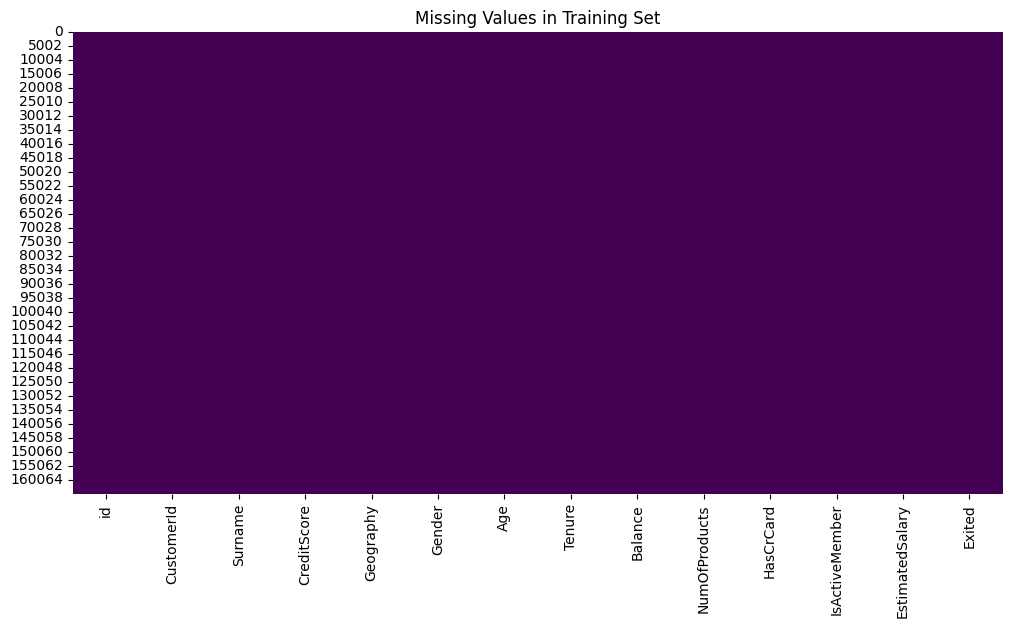

In [133]:
# plots the nan values
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Set')
plt.show()

In [134]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [135]:
df_train.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [136]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [137]:
cat_columns =['Tenure',  'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']
# find the value of the categorical columns
for col in cat_columns:
    print(f"{col}: {df_train[col].unique()}")
    print()


Tenure: [ 3  1 10  2  5  4  8  6  9  7  0]

NumOfProducts: [2 1 3 4]

HasCrCard: [1. 0.]

IsActiveMember: [0. 1.]

Exited: [0 1]



In [138]:
cat_columns =['Tenure',  'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']
# find the value of the categorical columns
for col in cat_columns:
    print(f"{col}: {df_train[col].value_counts()}")
    print()

Tenure: Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts: NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard: HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember: IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited: Exited
0    130113
1     34921
Name: count, dtype: int64



In [139]:
num_columns =['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# find the value of the categorical columns
for col in cat_columns:
    print(f"{col}: {df_train[col].unique()}")
    print()

Tenure: [ 3  1 10  2  5  4  8  6  9  7  0]

NumOfProducts: [2 1 3 4]

HasCrCard: [1. 0.]

IsActiveMember: [0. 1.]

Exited: [0 1]



In [140]:
num_columns =['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# find the value of the categorical columns
for col in cat_columns:
    print(f"{col}: {df_train[col].value_counts()}")
    print()

Tenure: Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts: NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard: HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember: IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited: Exited
0    130113
1     34921
Name: count, dtype: int64



In [141]:
cat_col = [col for col in df_train.columns 
           if df_train[col].dtype == 'object']
cat_col

['Surname', 'Geography', 'Gender']

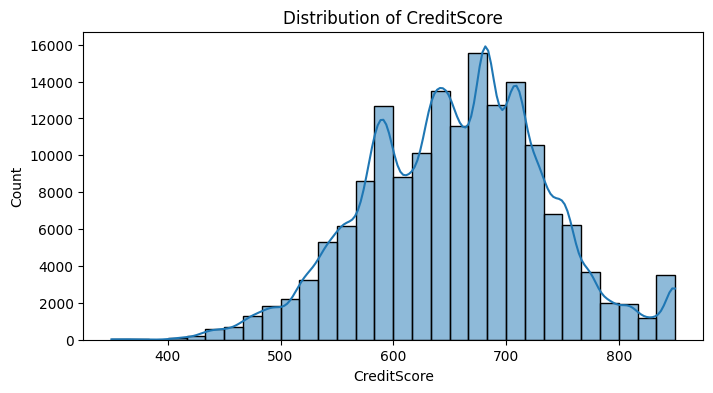

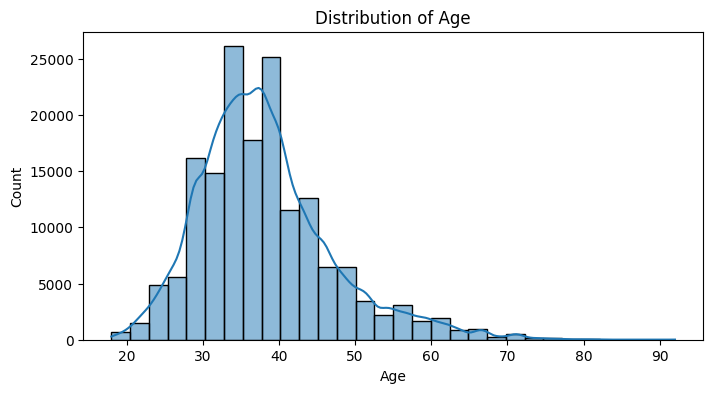

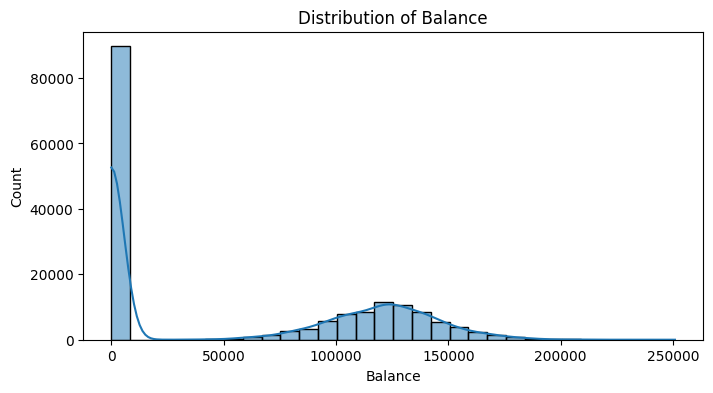

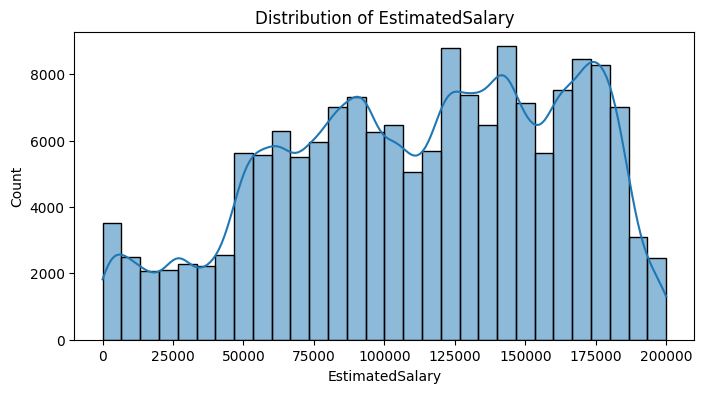

In [142]:
# create histogram for numerical columns
for col in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

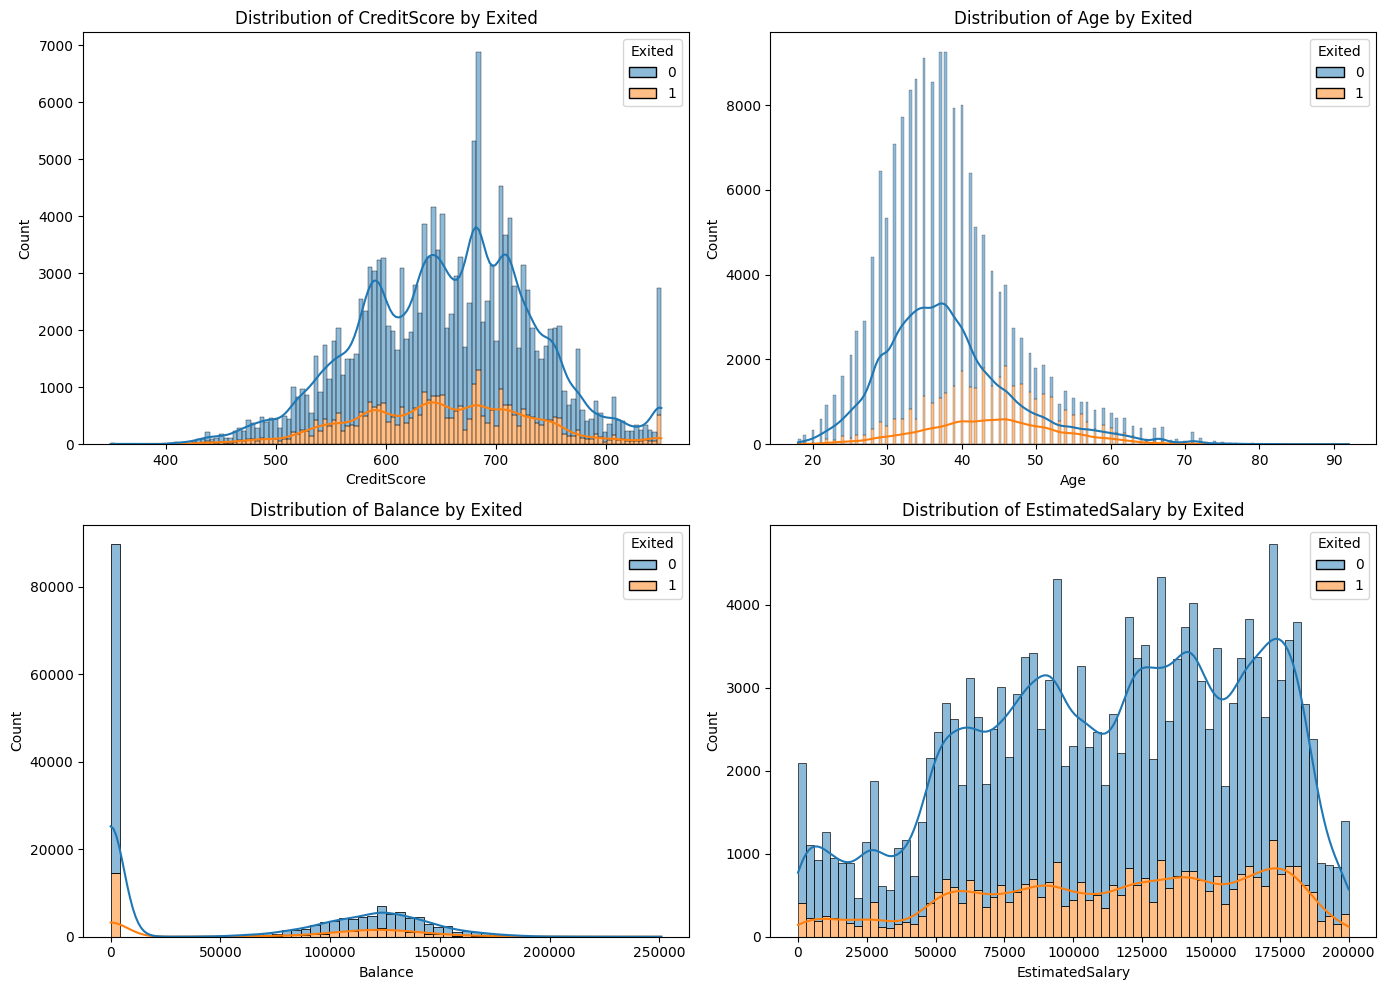

In [143]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_train, x=feature, hue='Exited', kde=True, ax=axes[i], multiple='stack')
    axes[i].set_title(f'Distribution of {feature} by Exited')

plt.tight_layout()
plt.show()

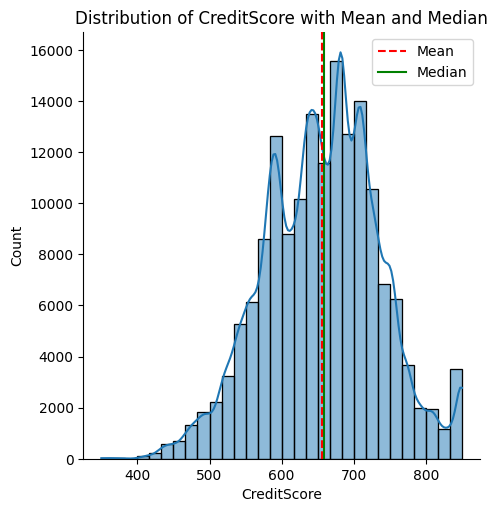

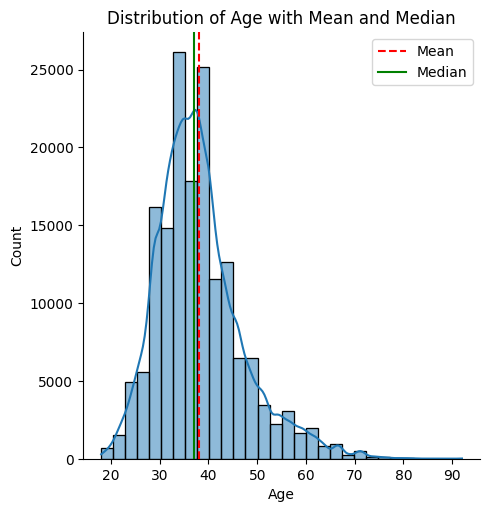

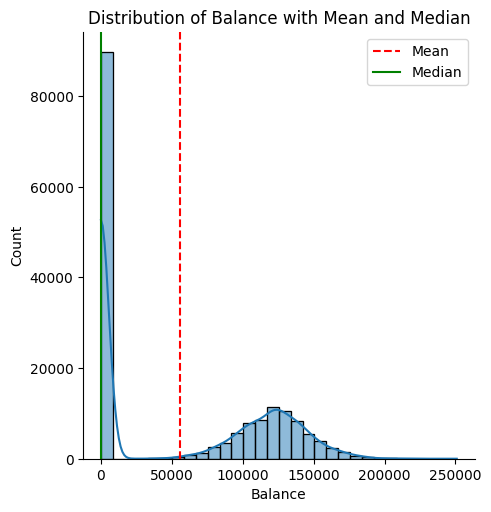

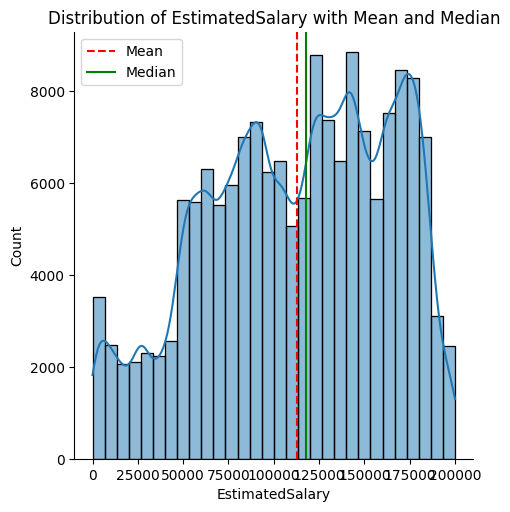

In [144]:
for col in num_columns:
    sns.displot(df_train[col], kde=True, bins=30)
    plt.axvline(df_train[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df_train[col].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Distribution of {col} with Mean and Median')
    plt.legend()
    plt.show()

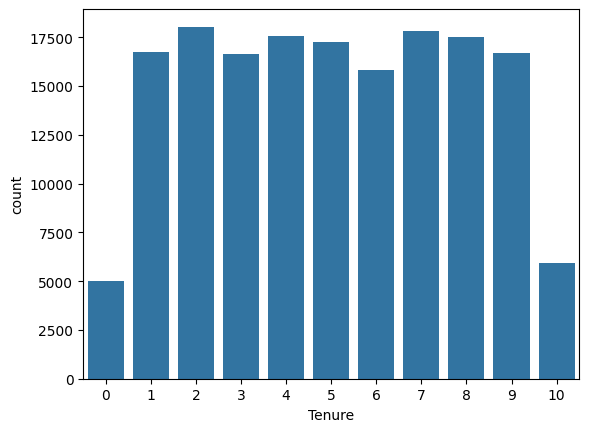

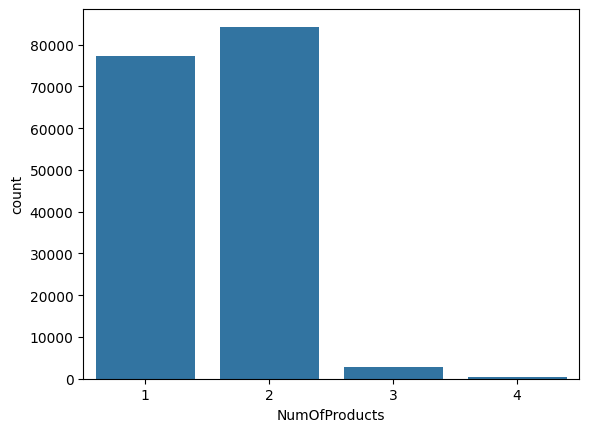

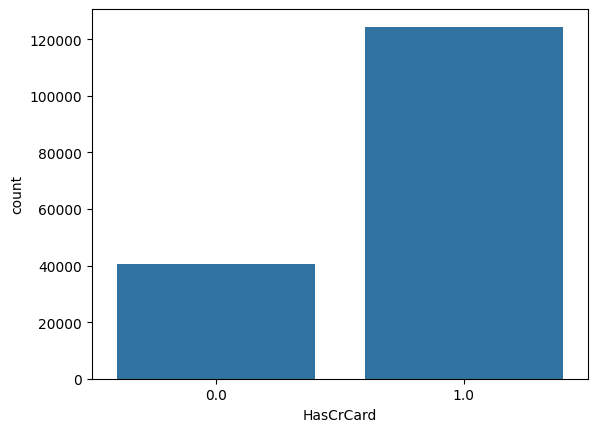

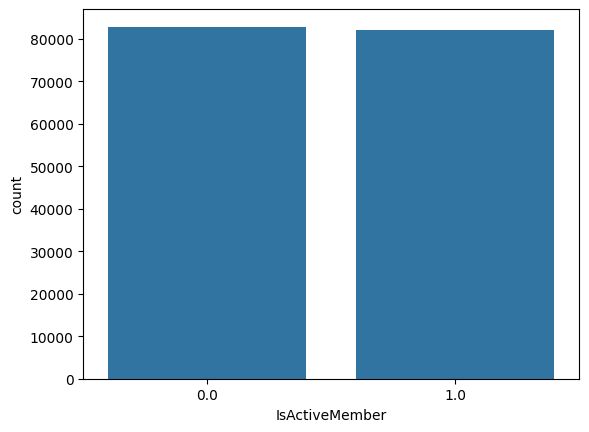

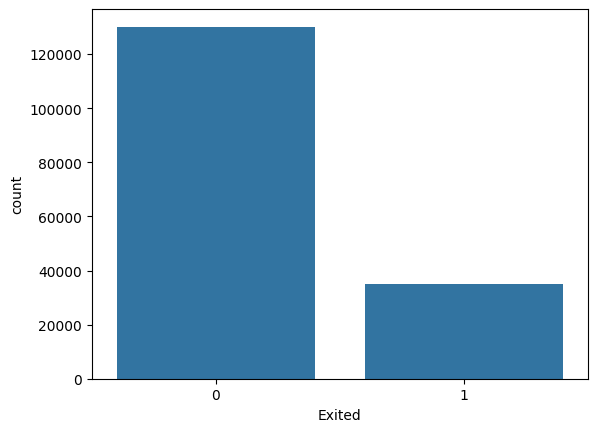

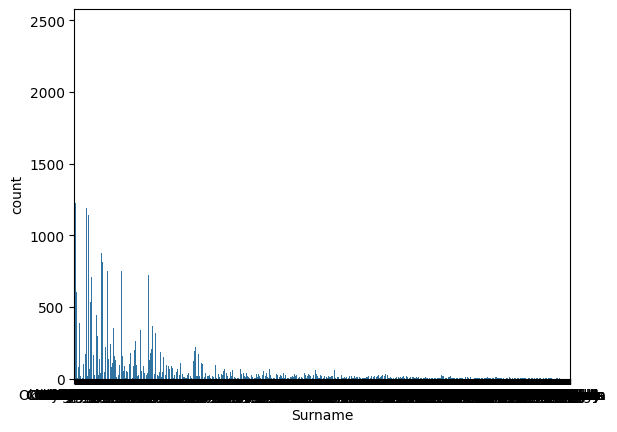

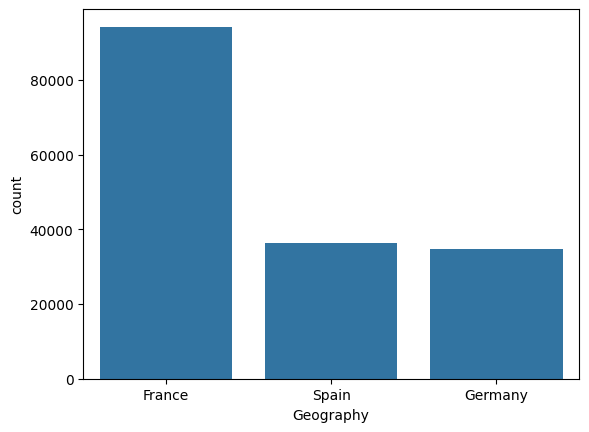

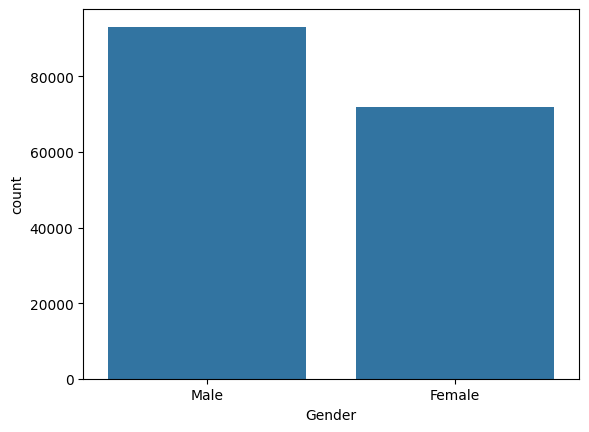

In [145]:

cat_columns =['Tenure',  'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited','Surname', 'Geography', 'Gender']

# create sub count plots of each columns
for col in cat_columns:
       sns.countplot(df_train, x= df_train[col])
       plt.show()

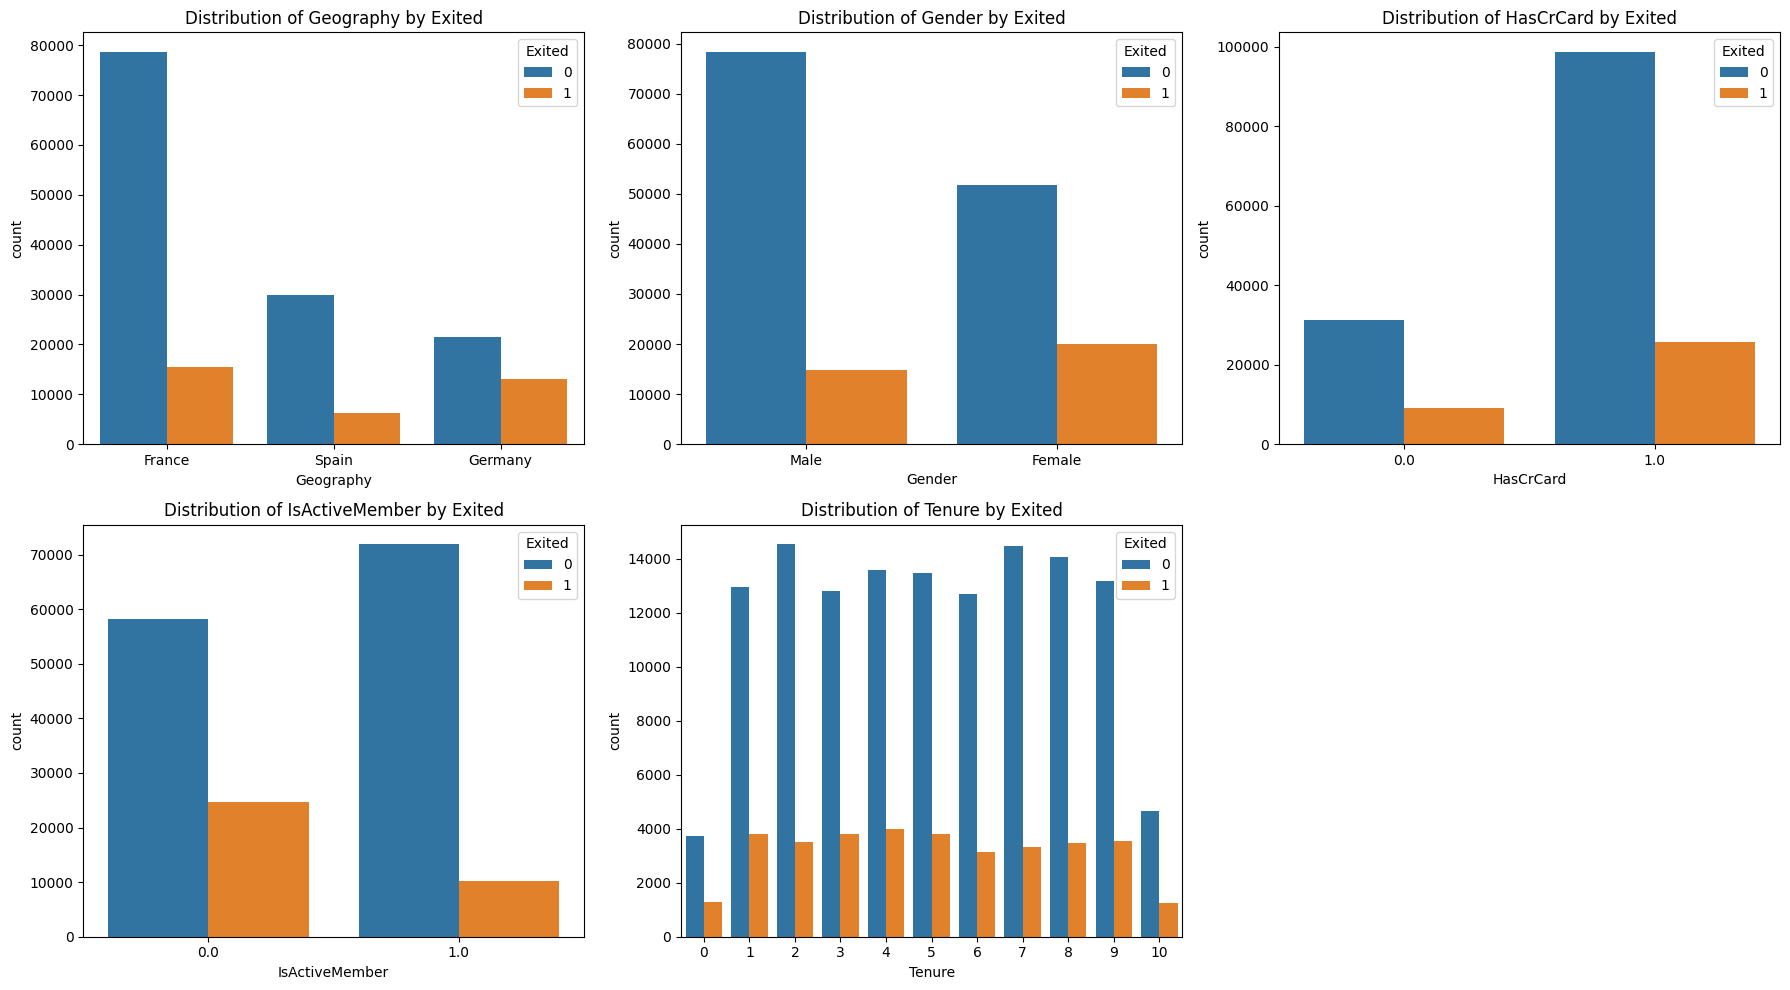

In [146]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Tenure']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, x=feature, hue='Exited', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Exited')

# Hide the last empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

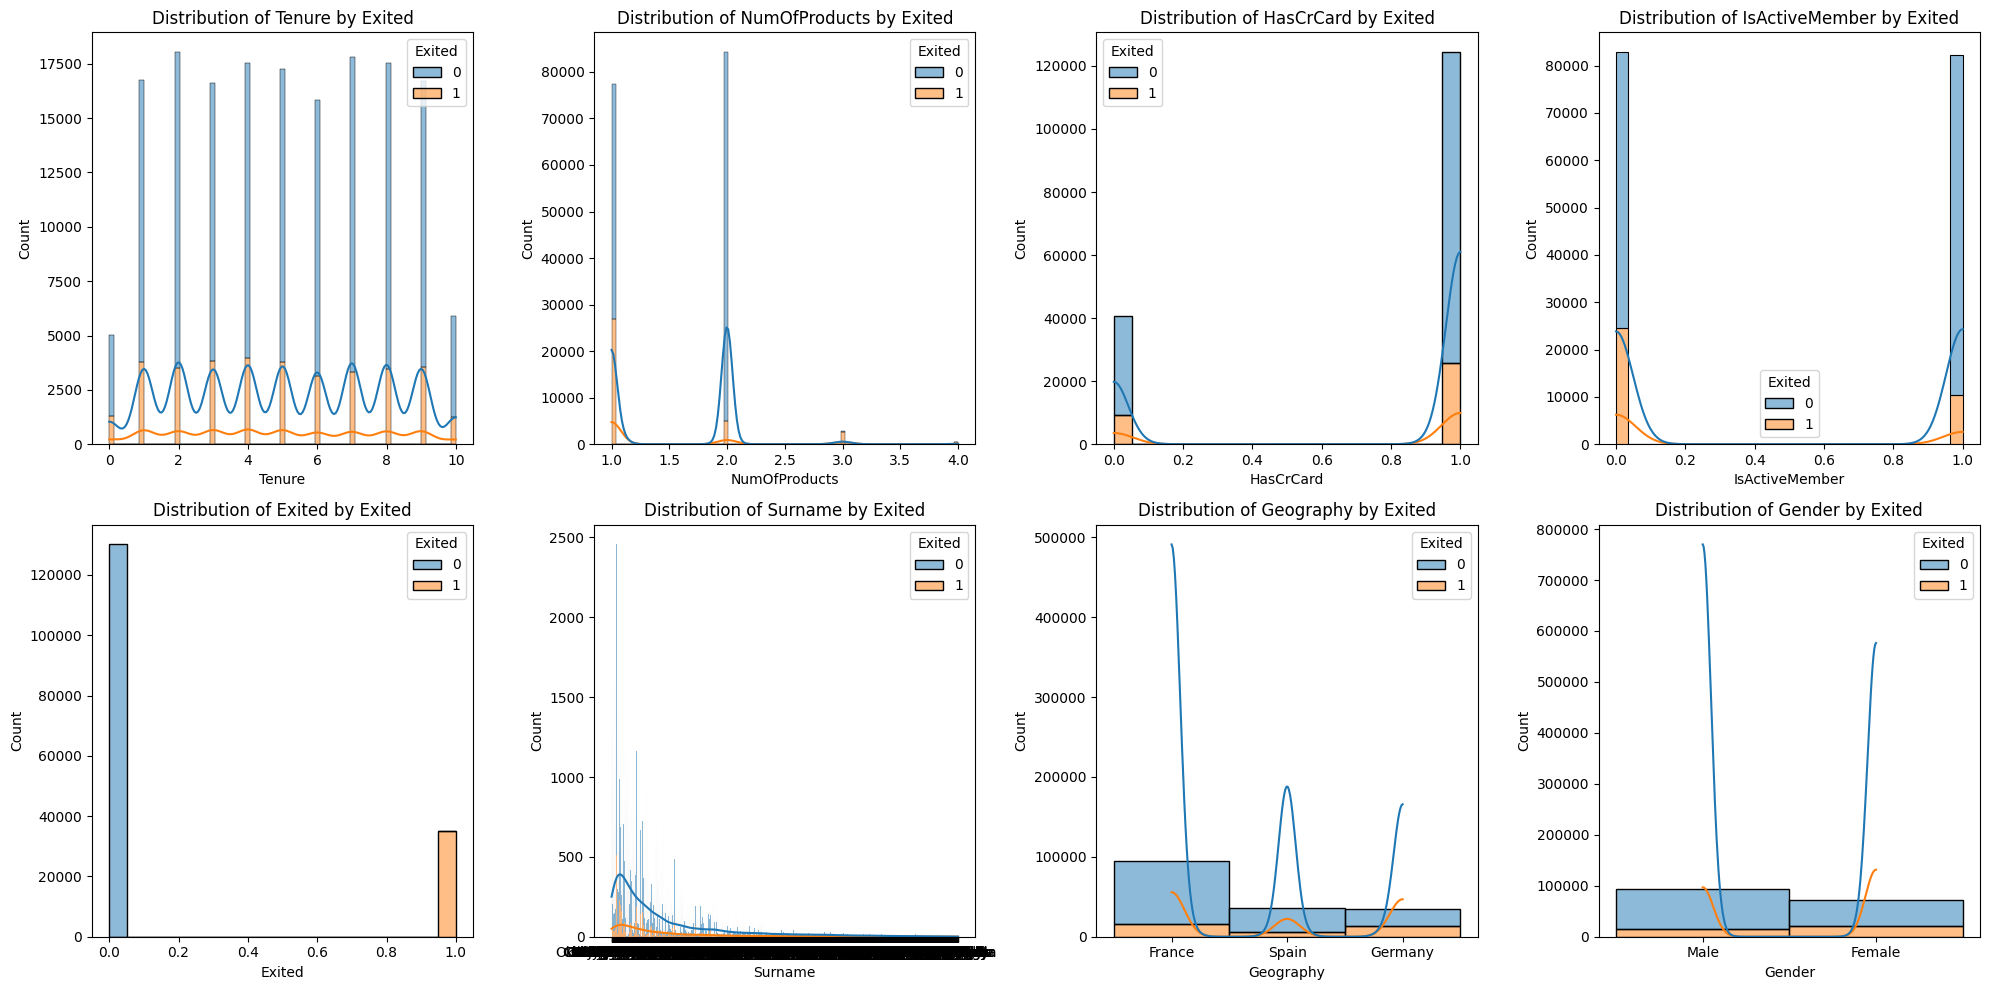

In [147]:
cata_features = ['Tenure',  'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited','Surname', 'Geography', 'Gender']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(cata_features):
    sns.histplot(data=df_train, x=feature, hue='Exited', kde=True, ax=axes[i], multiple='stack')
    axes[i].set_title(f'Distribution of {feature} by Exited')

plt.tight_layout()
plt.show()

In [148]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [149]:
# split the features and target
X = df_train.drop('Exited', axis=1)
y = df_train['Exited']

In [150]:
# encode the categor having object datatype using LabelEncoder


le = LabelEncoder()
for col in  cat_col:
    X[col] = le.fit_transform(X[col])

In [151]:
X.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [152]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 


Epoch 1/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6720 - loss: 1299.5179 - val_accuracy: 0.2116 - val_loss: 70.7812
Epoch 2/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6977 - loss: 109.9059 - val_accuracy: 0.7884 - val_loss: 0.5428
Epoch 3/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7884 - loss: 0.5182 - val_accuracy: 0.7884 - val_loss: 0.5161
Epoch 4/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7884 - loss: 0.5161 - val_accuracy: 0.7884 - val_loss: 0.5162
Epoch 5/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7884 - loss: 0.5161 - val_accuracy: 0.7884 - val_loss: 0.5161
Epoch 6/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7884 - loss: 0.5161 - val_accuracy: 0.7884 - val_loss: 0.5161
Epoch 7/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7884 - loss: 0.5161 - val_accuracy: 0.7884 - val_loss: 0.5163
Epoch 8/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7884 - l

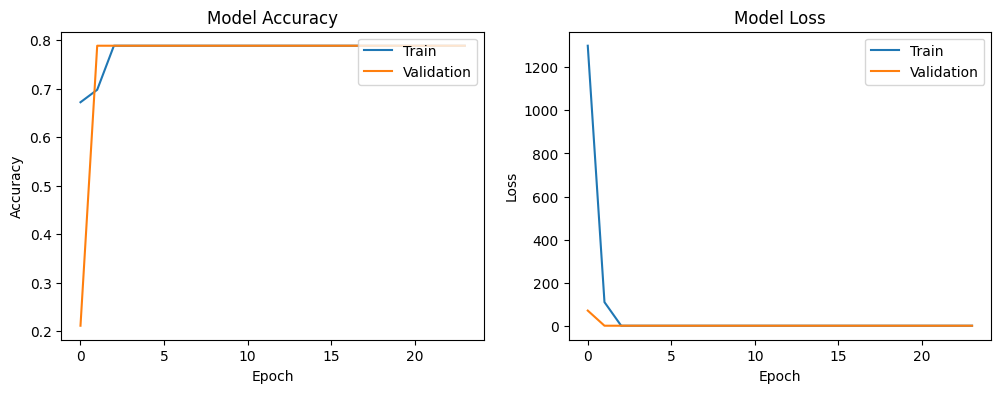

CPU times: total: 2min 31s
Wall time: 1min 48s


In [94]:
%%time
# creat a deep neural network modelucing tensorflow and keras for binary classification

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


#define the callback funtion
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train,epochs=100, 
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])
# evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')
# plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
# plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()







---
**Applying Rando, Forest Machine learning algorithm**
---

XGBoost Validation Accuracy: 0.8653
Confusion Matrix:
[[24707  1316]
 [ 3129  3855]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.75      0.55      0.63      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



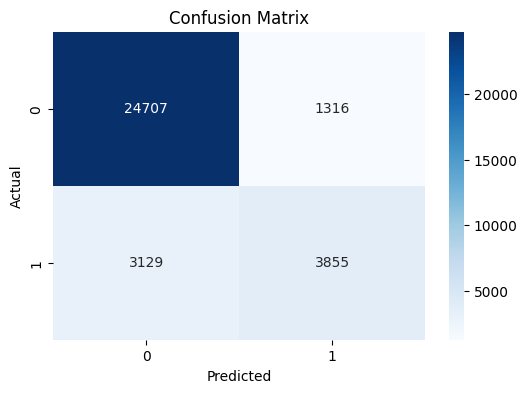

In [153]:
# applay xgboost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train) 
# make predictions
y_pred = xgb_model.predict(X_val)
# evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'XGBoost Validation Accuracy: {accuracy:.4f}')
cm=confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)
cr=classification_report(y_val, y_pred)
print("Classification Report:")
print(cr)
# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# predict the test data and create a submission file of probability of each class
y_pred = xgb.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))

submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)